Track voltage for single LIF neuron with noise and without noise
Also track spikes and refractory time of LIF neuron with noise over time.

In code for nengo.neurons (https://www.nengo.ai/nengo/_modules/nengo/neurons.html): 
    
class LIF(LIFRate):
    """Spiking version of the leaky integrate-and-fire (LIF) neuron model.

    Parameters
    ----------
    tau_rc : float
        Membrane RC time constant, in seconds. Affects how quickly the membrane
        voltage decays to zero in the absence of input (larger = slower decay).
    tau_ref : float
        Absolute refractory period, in seconds. This is how long the
        membrane voltage is held at zero after a spike.
    min_voltage : float
        Minimum value for the membrane voltage. If ``-np.inf``, the voltage
        is never clipped.
    amplitude : float
        Scaling factor on the neuron output. Corresponds to the relative
        amplitude of the output spikes of the neuron.
    """
    
probeable = ("spikes", "voltage", "refractory_time")

pip install nengo
pip install nengo-extras

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

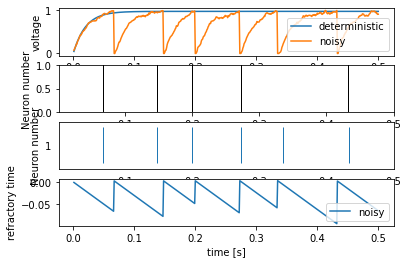

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.matplotlib import rasterplot
from nengo_extras.plot_spikes import plot_spikes, preprocess_spikes

time = .5
dt = .001
std = .01

process = nengo.processes.WhiteNoise(
    dist=nengo.dists.Gaussian(0, std), seed=1)

with nengo.Network() as model:
    ens_args = dict(encoders=[[1]], intercepts=[0.01], max_rates=[100])
    a = nengo.Ensemble(1, 1, **ens_args)
    b = nengo.Ensemble(1, 1, noise=process, **ens_args,  neuron_type=nengo.LIF())
    a_voltage = nengo.Probe(a.neurons, 'voltage')
    b_voltage = nengo.Probe(b.neurons, 'voltage')
    b_spikes = nengo.Probe(b.neurons, 'spikes')
    b_refractory_time = nengo.Probe(b.neurons, 'refractory_time')

with nengo.Simulator(model, dt = dt) as sim:
    sim.run(time)

# Plot voltage over time for noisy and deterministic LIF neuron
plt.figure()
plt.subplot(411)
plt.plot(sim.trange(), sim.data[a_voltage], label="deterministic")
plt.plot(sim.trange(), sim.data[b_voltage], label="noisy")
plt.xlabel('time [s]')
plt.ylabel('voltage')
plt.legend(loc=4)

# Testing 2 different spike raster plots: plot_spikes and rasterplot
plt.subplot(412)
plot_spikes(sim.trange(), sim.data[b_spikes])
plt.xlabel('time [s]')
plt.ylabel('Neuron number')

plt.subplot(413)
rasterplot(sim.trange(), sim.data[b_spikes])
plt.xlabel('time [s]')
plt.ylabel('Neuron number')

# Track refractory time over time
plt.subplot(414)
plt.plot(sim.trange(), sim.data[b_refractory_time], label="noisy")
plt.xlabel('time [s]')
plt.ylabel('refractory time')
plt.legend(loc=4);
